In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
msk = cv2.imread("HIRA20_SC_000001.png", 0)

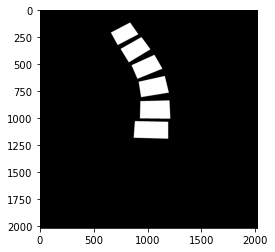

In [3]:
plt.imshow(msk, cmap='gray')

In [4]:
kernel = np.ones((25,25), np.uint8)
dilate = cv2.dilate(msk, kernel, iterations = 3)

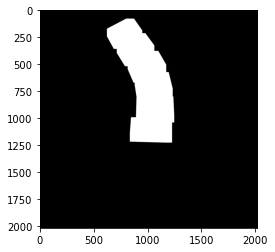

In [5]:
plt.imshow(dilate, cmap='gray')

In [12]:
def find_contours(org_img):
    contours, _= cv2.findContours(org_img.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours, len(contours) == 1

In [7]:
contours = crop_spine(dilate)

NameError: name 'crop_spine' is not defined

In [70]:
print()
for c in contours:
    print(c.shape)

AttributeError: 'list' object has no attribute 'shape'

In [71]:
cv2.boundingRect(contours)

TypeError: Expected cv::UMat for argument 'array'

In [76]:
rect = [cv2.boundingRect(cnt) for cnt in contours]
print("boundingRect length: " + str(len(contours)))

boundingRect length: 1


In [10]:
for i, (x, y, w, h) in enumerate(rect):
    left, top, right, bottom = x, y, x+w, y+h
    
        # cv2.imwrite('/data/hira2020/compression_ratio/hyoon/pred_image/cropped_spine_pred_image/'+name+'_'+str(i)+'img.png', crop(org_img, (left, top, right, bottom)))
#         cv2.imwrite('/contour_processing/1.png', crop(org_img, (left, top, right, bottom)))
    crop_img = crop(dilate, (left, top, right, bottom))

NameError: name 'rect' is not defined

In [11]:
def crop(image, coords, border=0, logging=False):
    # coords should be a tuple with (x1, y1, x2, y2)
    if logging:
        print("Shape of image: " + str(shape(image)))
    left, top, right, bottom = coords

    if isinstance(image, np.ndarray):
        return image[top: bottom, left: right]
    else:
        return image.crop((left, top, right, bottom))

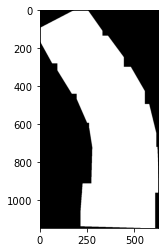

In [84]:
plt.imshow(crop_img, cmap='gray')

In [38]:
msk_path = 'C:/Users/sungjoo/Desktop/scoliosis_org/masks'
errormsk_path = 'C:/Users/sungjoo/Desktop/sc_ex/png_label_morph'
save_path = 'C:/Users/sungjoo/Desktop/sc_ex/new_morph'

In [39]:
kernel_size = 25
for i in os.listdir(msk_path):
    img2 = os.path.join(msk_path,i)
    msk = cv2.imread(img2, 0)
    
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilate = cv2.dilate(msk, kernel, iterations = 3)
    cv2.imwrite(os.path.join(save_path,i),dilate)

In [ ]:
#contour할 때 contour개수가 2개 이상일 경우 1개가 될 때까지 dilate kernel size 늘리기
msk_error_list = []
save_dir = 'C:/Users/sungjoo/Desktop/sc_ex/error'
for i in os.listdir(save_path):
    img = os.path.join(save_path,i)
    msk_error = cv2.imread(img, 0)
    
    _, is_single = find_contours(msk_error)
    
    
    ## Single Contour Case
    dilate = msk_error
    
    ## Multi Contour Case
    kernel_size = 27
    while not is_single:
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        dilate = cv2.dilate(msk_error, kernel, iterations = 3)
        
        _, is_single = find_contours(dilate)
        kernel_size += 2
    
    cv2.imwrite(os.path.join(save_dir, i), dilate)


In [10]:
def give_border(coords, border, shp, logging=False):
    flag = False
    coords = coords[0]-border, coords[1]-border, coords[2]+border, coords[3]+border

    if logging:
        print("Give border: " + str(coords))

    if coords[0] < 0:
        print("Left small: " + str(coords[0]))
        coords = (0, coords[1], coords[2], coords[3])
        flag = True
    if coords[1] < 0:
        print("Top small: " + str(coords[1]))
        coords = (coords[0], 0, coords[2], coords[3])
        flag = True

    if coords[2] > shp[1]:
        print("Right big: " + str(coords[2]))
        coords = (coords[0], coords[1], shp[1], coords[3])
        flag = True

    if coords[3] > shp[0]:
        print("Bottom Big: " + str(coords[3]))
        coords = (coords[0], coords[1], coords[2], shp[0])
        flag = True

    # if flag == False:
    #     print("Nothing has changed in give border")
    return coords

In [31]:
error_images_102 = 'C:/Users/sungjoo/Desktop/scoliosis_org/masks/HIRA20_SC_000102.png'

In [28]:
org_images_102 = 'C:/Users/sungjoo/Desktop/scoliosis_org/masks/HIRA20_SC_000102.png'

In [33]:
img = cv2.imread(error_images_102,0)

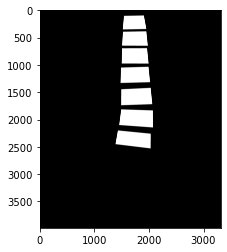

In [30]:
plt.imshow(img, cmap ='gray')

In [34]:
kernel = np.ones((25,25), np.uint8)
dilate = cv2.dilate(img, kernel, iterations = 3)

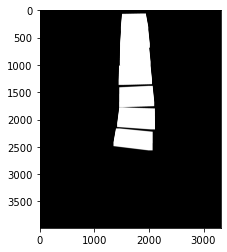

In [35]:
plt.imshow(dilate,cmap='gray')